In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_excel("C:/Users/Dell/Downloads/sydney_rain prediction.xlsx")

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [5]:
df.drop('Date',axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)

KeyError: "['Date'] not found in axis"

In [6]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3334.000000  3335.000000  3331.000000  3286.000000  3321.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.553641     4.494638     9.895172     2.777407     3.810886   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.300000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3323.000000  3324.000000  3317.000000  3318.000000  2771.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.085355    16.293530     7.021571     7.032211     2.749578   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.700000  1011.300000     1.000000   
50%      69.000000    56.000000  1018.600000  1016.300000     5.000000   
75%      80.000000    65.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  
count  2776.000000  3333.000000  3333.000000  
mean      4.218660    17.819742    21.533333  
std       2.641885     4.897177     4.303737  
min       0.000000     6.400000    10.200000  
25%       1.000000    13.800000    18.400000  
50%       4.000000    18.200000    21.300000  
75%       7.000000    21.700000    24.500000  
max       8.000000    36.500000    44.700000

<Axes: xlabel='Humidity3pm'>

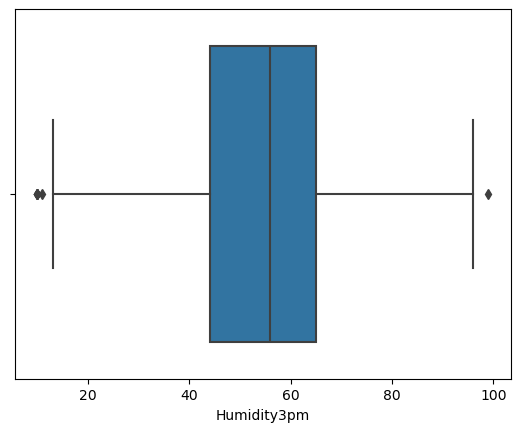

In [8]:
sns.boxplot(x="Humidity3pm", data=df)

<Axes: xlabel='Humidity9am'>

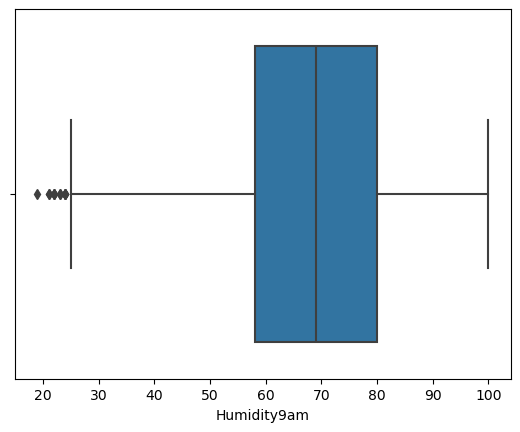

In [10]:
sns.boxplot(x="Humidity9am", data=df)

<Axes: xlabel='Rainfall'>

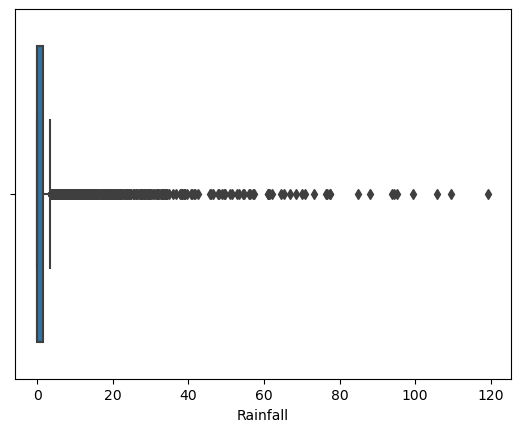

In [11]:
sns.boxplot(x="Rainfall", data=df)

In [13]:
q1= df['Humidity3pm'].quantile(0.25)
q3= df['Humidity3pm'].quantile(0.75)


IQR= q3-q1

lower_bound= q1- 1.5*IQR
upper_bound= q3+ 1.5*IQR

df= df[(df['Humidity3pm'] >=lower_bound) & (df['Humidity3pm'] <= upper_bound)]

In [14]:
q1 = df['Humidity9am'].quantile(0.25)
q3= df['Humidity9am'].quantile(0.75)

IQR= q3-q1

lower_bound=q1-1.5*IQR
upper_bound= q3+1.5*IQR

df=df[(df['Humidity9am'] >= lower_bound) & (df['Humidity9am']<=upper_bound)]

<Axes: xlabel='Humidity3pm'>

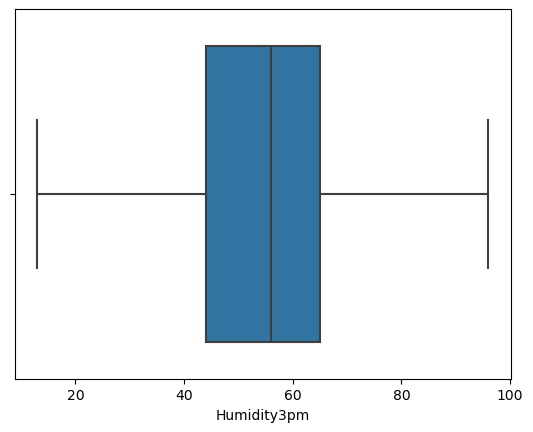

In [16]:
sns.boxplot(x="Humidity3pm", data=df)

<Axes: xlabel='Humidity9am'>

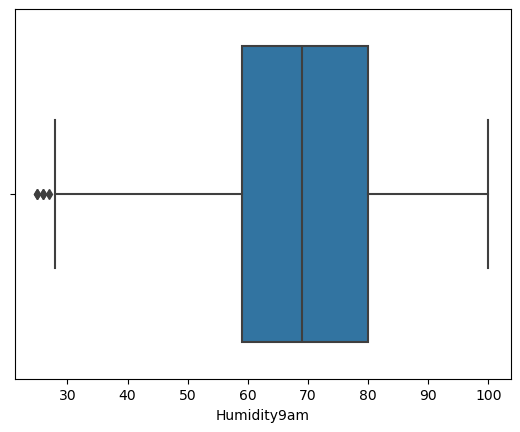

In [18]:
sns.boxplot(x="Humidity9am", data=df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3301 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      3301 non-null   object 
 1   MinTemp       3299 non-null   float64
 2   MaxTemp       3300 non-null   float64
 3   Rainfall      3295 non-null   float64
 4   Evaporation   3250 non-null   float64
 5   Sunshine      3286 non-null   float64
 6   Humidity9am   3301 non-null   float64
 7   Humidity3pm   3301 non-null   float64
 8   Pressure9am   3284 non-null   float64
 9   Pressure3pm   3286 non-null   float64
 10  Cloud9am      2743 non-null   float64
 11  Cloud3pm      2749 non-null   float64
 12  Temp9am       3301 non-null   float64
 13  Temp3pm       3301 non-null   float64
 14  RainToday     3295 non-null   object 
 15  RainTomorrow  3301 non-null   object 
dtypes: float64(13), object(3)
memory usage: 438.4+ KB


In [21]:
df.MinTemp=df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp= df.MaxTemp.fillna(df.MaxTemp.mean())
df.Pressure9am= df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm=df.Pressure3pm.fillna(df.Pressure3pm.mean())

In [23]:
df.Evaporation=df.Evaporation.fillna(0)
df.Sunshine=df.Sunshine.fillna(0)
df.Cloud9am= df.Cloud9am.fillna(0)
df.Cloud3pm= df.Cloud3pm.fillna(0)
df.Rainfall= df.Rainfall.fillna(0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3301 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      3301 non-null   object 
 1   MinTemp       3301 non-null   float64
 2   MaxTemp       3301 non-null   float64
 3   Rainfall      3301 non-null   float64
 4   Evaporation   3301 non-null   float64
 5   Sunshine      3301 non-null   float64
 6   Humidity9am   3301 non-null   float64
 7   Humidity3pm   3301 non-null   float64
 8   Pressure9am   3301 non-null   float64
 9   Pressure3pm   3301 non-null   float64
 10  Cloud9am      3301 non-null   float64
 11  Cloud3pm      3301 non-null   float64
 12  Temp9am       3301 non-null   float64
 13  Temp3pm       3301 non-null   float64
 14  RainToday     3295 non-null   object 
 15  RainTomorrow  3301 non-null   object 
dtypes: float64(13), object(3)
memory usage: 438.4+ KB


In [25]:
df=pd.get_dummies(df, drop_first=True)
df.RainToday_Yes= df.RainToday_Yes.astype(int)
df.RainTomorrow_Yes=df.RainTomorrow_Yes.astype(int)

In [26]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6          6.2       0.0         92.0   
1     19.5     25.6       6.0          3.4       2.7         83.0   
2     21.6     24.5       6.6          2.4       0.1         88.0   
3     20.2     22.8      18.8          2.2       0.0         83.0   
4     19.7     25.7      77.4          0.0       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.9              1                 1  
1     24.8              1                 1  
2     23.0              1                 1  
3     20.9              1                 1  
4     25.5              1                 1

In [28]:
X=df.loc[:, df.columns !='RainTomorrow_Yes']

In [30]:
X.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6          6.2       0.0         92.0   
1     19.5     25.6       6.0          3.4       2.7         83.0   
2     21.6     24.5       6.6          2.4       0.1         88.0   
3     20.2     22.8      18.8          2.2       0.0         83.0   
4     19.7     25.7      77.4          0.0       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  
0     20.9              1  
1     24.8              1  
2     23.0              1  
3     20.9              1  
4     25.5              1

In [31]:
y=df['RainTomorrow_Yes']

In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: int32

# TRAIN TEST SPLIT

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [39]:
X_train.shape

(2640, 14)

In [40]:
X_test.shape

(661, 14)

# LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf_lrs= LogisticRegression()

In [43]:
clf_lrs.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
clf_lrs.coef_

array([[-0.10384839,  0.08972675,  0.03664978,  0.0255235 , -0.22527622,
         0.0065912 ,  0.05307886, -0.07637078,  0.07241697, -0.12189663,
         0.1615123 ,  0.04309171, -0.03611591,  0.07140374]])

In [45]:
clf_lrs.intercept_

array([0.00093824])

In [47]:
import statsmodels.api as sn

In [48]:
X_cons=sn.add_constant(X)

In [50]:
import statsmodels.discrete.discrete_model as sm

In [53]:
logit= sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.381344
         Iterations 7


In [54]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3301
Model:                          Logit   Df Residuals:                     3286
Method:                           MLE   Df Model:                           14
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.3348
Time:                        16:21:57   Log-Likelihood:                -1258.8
converged:                       True   LL-Null:                       -1892.4
Covariance Type:            nonrobust   LLR p-value:                6.041e-262
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.8854      8.604      3.706      0.000      15.022      48.749
MinTemp          -0.2157      0.049     -4.444      0.000      -0.311      -0.121
MaxTemp           0.0680      0.044      1.554      0.120      -0.018       0.154
Rainfall          0.0113      0.006      1.748      0.080      -0.001       0.024
Evaporation       0.0553      0.025      2.228      0.026       0.007       0.104
Sunshine         -0.2267      0.019    -11.681      0.000      -0.265      -0.189
Humidity9am       0.0126      0.007      1.822      0.069      -0.001       0.026
Humidity3pm       0.0547      0.007      7.854      0.000       0.041       0.068
Pressure9am      -0.1159      0.031     -3.705      0.000      -0.177      -0.055
Pressure3pm       0.0804      0.030      2.668      0.008       0.021       0.139
Cloud9am         -0.0969      0.027     -3.602      0.000      -0.150      -0.044
Cloud3pm          0.1288      0.027      4.823      0.000       0.076       0.181
Temp9am           0.1278      0.052      2.470      0.013       0.026       0.229
Temp3pm          -0.0252      0.052     -0.487      0.626      -0.126       0.076
RainToday_Yes     0.7029      0.137      5.142      0.000       0.435       0.971
=================================================================================
"""

using train test split


In [55]:
clf_LR= LogisticRegression()
clf_LR.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
# predicting values
y_test_pred= clf_LR.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score

In [58]:
confusion_matrix(y_test, y_test_pred)

array([[451,  36],
       [ 83,  91]], dtype=int64)

In [59]:
roc_auc_score(y_test, y_test_pred)

0.7245332672472798

In [60]:
precision_score(y_test, y_test_pred)

0.7165354330708661

In [61]:
recall_score(y_test, y_test_pred)

0.5229885057471264

In [62]:
accuracy_score(y_test, y_test_pred)

0.8199697428139183

# LINEAR DISCRIMINANT ANALYSIS

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
clf_lda= LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [65]:
y_pred_lda= clf_lda.predict(X_test)

In [66]:
y_pred_lda

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
confusion_matrix(y_test, y_pred_lda)

array([[451,  36],
       [ 78,  96]], dtype=int64)

In [68]:
roc_auc_score(y_test, y_pred_lda)

0.7389010833392339

In [69]:
precision_score(y_test, y_pred_lda)

0.7272727272727273

In [70]:
recall_score(y_test, y_pred_lda)

0.5517241379310345

In [71]:
accuracy_score(y_test, y_pred_lda)

0.8275340393343419

# K NEAREST NEIGHBOURS

In [74]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)

In [75]:
scaler= preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

In [76]:
X_test_s

array([[-1.17109692, -0.09392084, -0.35315671, ..., -0.51627279,
        -0.7338222 , -0.60940077],
       [ 0.8732693 ,  0.69670468, -0.35315671, ...,  1.00261131,
         0.67701716, -0.60940077],
       [-1.70440985, -1.00081483, -0.35315671, ..., -1.8709532 ,
        -0.7338222 , -0.60940077],
       ...,
       [-0.7933336 , -1.14033698,  3.36070098, ..., -0.47522186,
        -1.82289118,  1.64095625],
       [-0.14891381, -0.16368192, -0.35315671, ..., -0.06471265,
        -0.115033  , -0.60940077],
       [-0.97110458, -0.44272622, -0.35315671, ..., -1.19361299,
        -0.21403928, -0.60940077]])

In [77]:
# KNN with N=1
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1= KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [78]:
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

array([[419,  68],
       [ 82,  92]], dtype=int64)

In [79]:
accuracy_score(y_test, clf_knn_1.predict(X_test_s))

0.773071104387292

In [80]:
# KNN with N=3
clf_knn_3= KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
accuracy_score(y_test, clf_knn_3.predict(X_test_s))

0.8063540090771558

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
params= {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30]}

In [84]:
grid_search_cv=GridSearchCV(KNeighborsClassifier(), params)

In [85]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 30]})

In [86]:
#finding the best N value for our model
grid_search_cv.best_params_

{'n_neighbors': 17}

In [87]:
optimised_KNN= grid_search_cv.best_estimator_

In [88]:
y_test_KNN= optimised_KNN.predict(X_test_s)

In [89]:
confusion_matrix(y_test, y_test_KNN)

array([[458,  29],
       [ 91,  83]], dtype=int64)

In [90]:
precision_score(y_test, y_test_KNN)

0.7410714285714286

In [91]:
roc_auc_score(y_test, y_test_KNN)

0.7087316198163751

In [92]:
accuracy_score(y_test, y_test_KNN)

0.8184568835098336

# CLASSIFICATION TREE

In [93]:
# training classification tree
from sklearn import tree
clftree= tree.DecisionTreeClassifier(max_depth=3)

In [94]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [95]:
# predicting values using trained model 
Y_train_clftree= clftree.predict(X_train)
y_test_clftree= clftree.predict(X_test)

In [96]:
y_test_clftree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
confusion_matrix(y_test,y_test_clftree)

array([[437,  50],
       [ 73, 101]], dtype=int64)

In [99]:
precision_score(y_test, y_test_clftree)

0.6688741721854304

In [100]:
recall_score(y_test, y_test_clftree)

0.5804597701149425

In [102]:
roc_auc_score(y_test, y_test_clftree)

0.7388951827987444

In [103]:
accuracy_score(y_test, y_test_clftree)

0.8139183055975794

# PLOTTING THE TREE

In [106]:
dot_data = tree.export_graphviz(clftree, out_file= None, feature_names= X_train.columns, filled= True)

In [108]:
from IPython.display import Image


In [109]:
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [110]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [113]:
# controlling the tree growth
clftree2 = tree.DecisionTreeClassifier(min_sample_leaf=20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data= tree.export_graphviz(clftree2, out_file= None, feature_names= X_train.columns, filled= True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'min_sample_leaf'

In [114]:
accuracy_score(y_test, clftree2.predict(X_test))

NameError: name 'clftree2' is not defined

# BAGGING

In [115]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier

In [117]:
from sklearn.ensemble import BaggingClassifier

In [119]:
bag_clf= BaggingClassifier(base_estimator= clftree, n_estimators=1000,
                           bootstrap=True, n_jobs=-1,
                           random_state=42)

In [124]:
bag_clf.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [125]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[487,   0],
       [174,   0]], dtype=int64)

In [126]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.7367624810892587

# RANDOM FOREST

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf_clf= RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [133]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [134]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[463,  24],
       [ 84,  90]], dtype=int64)

In [135]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.8366111951588502

In [136]:
# finding best parameters using grid search

In [137]:
rf_clf= RandomForestClassifier(n_estimators=250, random_state=42)

In [138]:
params_grid={"max_features":[4,5,6,7,8,9,10],
             "min_samples_split":[2,3,10],
            }

In [141]:
grid_search=GridSearchCV(rf_clf, params_grid,
                         n_jobs=-1, cv=5, scoring='accuracy')

In [143]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [144]:
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 3}

In [145]:
cvrf_clf= grid_search.best_params_

In [146]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

AttributeError: 'dict' object has no attribute 'predict'

In [ ]:
accuracy_scpre(y_test, cvrf_clf.predict(X_test))

# GRADIENT BOOSTING

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
gbc_clf=GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [154]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.8320726172465961

In [159]:
gbc_clf= GradientBoostingClassifier(learning_rate= 0.02, n_estimators= 1000, max_depth = 1)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [1]:
accuracy_score(y_test, gbc_clf.predict(X_test))

NameError: name 'accuracy_score' is not defined

The problem statement revolves around creating a machine learning model to predict rainfall accurately, aiding "The Daily Buzz" newspaper's new column, "The Weather Oracle." It emphasizes the importance of ensemble methods for better accuracy and outlines steps for data preprocessing, model building, and evaluation.

My approach would involve thorough data preprocessing, including handling missing values and outliers, followed by training various classification models such as Decision Trees, Random Forest, and Gradient Boosting. I would evaluate each model's performance using accuracy scores and confusion matrices and select the best-performing model for further analysis.